# Fixed point method and iterative methods for solving linear systems

<hr style="border-width:2px; border-color:coral"></hr>

This problem illustrates how we can used a "pre-conditioned fixed-point method" to solve the problem 

\begin{equation*}
f(x) = b-ax = 0
\end{equation*}

using the equivalent fixed point iteration $x = g(x)$, where

\begin{equation*}
g(x) \equiv m^{-1}(b-ax) + x
\end{equation*}

for some value of $m$.  

To see how the choice of $m$ affect the convergence of the fixed point method, we rewrite the fixed point method as 

\begin{equation}
x = (1-m^{-1}a)x + m^{-1}b
\end{equation}

The fixed point iteration is then given by

\begin{equation}
x_{k+1} = (1-m^{-1}a)x_k + m^{-1}b.
\end{equation}

Defining $e_{k} \equiv  x_k - x_{k-1}$, we get

\begin{equation}
e_{k} = (1-m^{-1}a)e_{k-1} = ... = (1-m^{-1}a)^{k} e_0
\end{equation}

or

\begin{equation}
\left|e_k\right| \le \left|1 - m^{-1}a\right|^k |e_0|
\end{equation}

Convergence is then assured if 

\begin{equation}
\left|1 - m^{-1}a\right| < 1
\end{equation}

or $0 < m^{-1}a < 2$.   This is equivalent to the more general condition $|g'(x)| < 1$.

What is now obvious is that if we can make $\left|1 - m^{-1}a\right| \ll 1$, we can expect fast convergence.

We will see that this scalar problem can be viewed as an analogue to the linear system

\begin{equation}
F(\mathbf x) = \mathbf b-A\mathbf x
\end{equation}

For the system, the iteration takes the form

\begin{equation}
\mathbf x_{k+1} = \mathbf x_k + M^{-1}\left( \mathbf b - A \mathbf x_k\right)
\end{equation}

which we can write as

\begin{equation}
\mathbf x_{k+1} = \left(I - M^{-1}A\right) \mathbf x_k + M^{-1}\mathbf b
\end{equation}

for some non-singular matrix $M$.  A sufficient condition for convergence is $\rho\left(I - M^{-1}A\right) < 1$, where $\rho(B)$ is the *spectral radius* of the matrix of matrix $B$, defined as

\begin{equation*}
\rho(B) = \max\{|\lambda| : \mbox{where $\lambda$ is an eigenvalue of $B$}\}
\end{equation*}

The advantages of this approach is that if we can find an $M$ that is both easy to invert, and satisfies a convergence condition, it might be less work computationally to iterate to a solution (possibly stopping early if we are happy with our solution) than applying  a direct method.  Furthermore, this method only requires that we be able to multiply $\mathbf x_k$ by $A$.


Use the slider below to interactively vary the value of $\alpha\equiv g'(x)=(1-m^{-1}a)$ to see how the choice of $m$ affects the convergence of using the fixed point iteration to solve $f(x) = b-ax = 0$. 



In [1]:
%matplotlib notebook
%pylab

from ipywidgets import interactive, fixed
import warnings

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


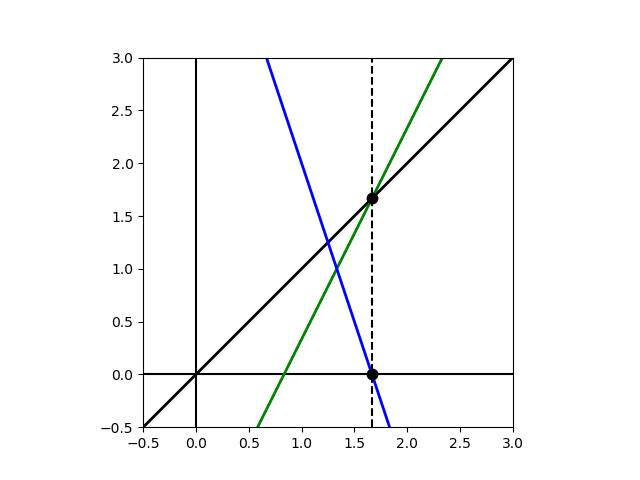

In [2]:
from fp_tools import *

# Define axis limits
xl = array([-.5, 3.])
yl = array([-0.5, 3.])

kmax = 200   # maximum number of fixed point iterations
a = 3.       # Define f(x) = a/3(5-3x) = 5/3*a - a*x
b = 5.

x0 = 0.5    # Initial m value

plot_f = True

slider = fixed_point(xl,yl,a,b,kmax,x0,plot_f);

In [3]:
display(slider)   

interactive(children=(FloatSlider(value=0.0, description='alpha', max=2.0, min=-2.0, step=0.04), Output()), _d…